In [ ]:
############## Nhan dien Tien Viet Nam ############

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_image_files_path = "/content/drive/MyDrive/Tien VN/Train"
valid_image_files_path = "/content/drive/MyDrive/Tien VN/Validation"
label=['100k','10k ','1k','200','200k','20k','2k','500','500k','50k','5k']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(250, 250),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(250, 250),               
    class_mode='categorical')

Found 405 images belonging to 11 classes.
Found 102 images belonging to 11 classes.


In [ ]:
model=tf.keras.models.Sequential()

model.add(Conv2D(32,(3,3), activation='relu',input_shape=(250,250,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  
model.add(Flatten()) 

model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(11, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])
history=model.fit(
    train_generator,
    steps_per_epoch=1,
    epochs=150,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=1)

Epoch 1/150
1/1 [==============================] - 24s 24s/step - loss: 2.4093 - acc: 0.0000e+00 - val_loss: 23.2868 - val_acc: 0.0625
Epoch 2/150
1/1 [==============================] - 13s 13s/step - loss: 22.4859 - acc: 0.1250 - val_loss: 10.6173 - val_acc: 0.0938
Epoch 3/150
1/1 [==============================] - 11s 11s/step - loss: 12.8473 - acc: 0.0625 - val_loss: 3.5831 - val_acc: 0.1875
Epoch 4/150
1/1 [==============================] - 7s 7s/step - loss: 3.6709 - acc: 0.0625 - val_loss: 2.7313 - val_acc: 0.0938
Epoch 5/150
1/1 [==============================] - 7s 7s/step - loss: 2.4675 - acc: 0.0938 - val_loss: 2.4751 - val_acc: 0.0312
Epoch 6/150
1/1 [==============================] - 7s 7s/step - loss: 2.5040 - acc: 0.0625 - val_loss: 2.2797 - val_acc: 0.1875
Epoch 7/150
1/1 [==============================] - 7s 7s/step - loss: 2.3694 - acc: 0.0625 - val_loss: 2.3618 - val_acc: 0.2500
Epoch 8/150
1/1 [==============================] - 6s 6s/step - loss: 2.4025 - acc: 0.1905

Saving 2K 11.jpg to 2K 11.jpg
[[0.000000e+00 0.000000e+00 0.000000e+00 4.033024e-14 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00]]
Giá trị dự đoán:  2k


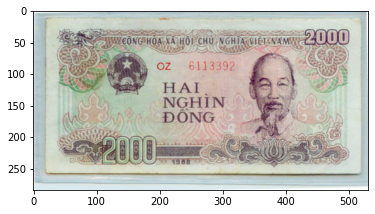

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(250,250))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving 500 12.jpg to 500 12.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Giá trị dự đoán:  500


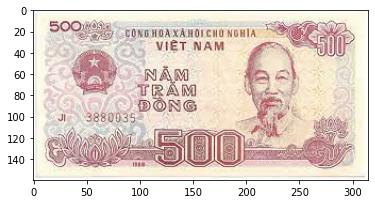

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(250,250))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])